# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


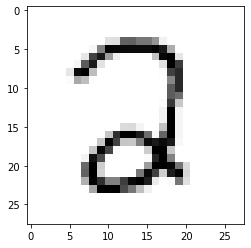

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2078
Training Accuracy: 0.7924, Testing Accuracy: 0.8049



Epoch 10, Loss 0.0535
Training Accuracy: 0.9398, Testing Accuracy: 0.9501



Epoch 20, Loss 0.0393
Training Accuracy: 0.9560, Testing Accuracy: 0.9617



Epoch 30, Loss 0.0331
Training Accuracy: 0.9621, Testing Accuracy: 0.9677



Epoch 40, Loss 0.0294
Training Accuracy: 0.9653, Testing Accuracy: 0.9733



Epoch 50, Loss 0.0267
Training Accuracy: 0.9690, Testing Accuracy: 0.9763



Epoch 60, Loss 0.0247
Training Accuracy: 0.9724, Testing Accuracy: 0.9768



Epoch 70, Loss 0.0232
Training Accuracy: 0.9742, Testing Accuracy: 0.9768



Epoch 80, Loss 0.0219
Training Accuracy: 0.9761, Testing Accuracy: 0.9773



Epoch 90, Loss 0.0207
Training Accuracy: 0.9775, Testing Accuracy: 0.9768



Epoch 100, Loss 0.0198
Training Accuracy: 0.9782, Testing Accuracy: 0.9778



Epoch 110, Loss 0.0189
Training Accuracy: 0.9795, Testing Accuracy: 0.9783



Epoch 120, Loss 0.0182
Training Accuracy: 0.9803, Testing Accuracy: 0.9788



Epoch 130, Loss 0.0175
Training Accuracy: 0.9810, Testing Accuracy: 0.9798



Epoch 140, Loss 0.0169
Training Accuracy: 0.9820, Testing Accuracy: 0.9803



Epoch 150, Loss 0.0163
Training Accuracy: 0.9826, Testing Accuracy: 0.9808



Epoch 160, Loss 0.0158
Training Accuracy: 0.9831, Testing Accuracy: 0.9808



Epoch 170, Loss 0.0153
Training Accuracy: 0.9839, Testing Accuracy: 0.9814



Epoch 180, Loss 0.0148
Training Accuracy: 0.9847, Testing Accuracy: 0.9819



Epoch 190, Loss 0.0143
Training Accuracy: 0.9851, Testing Accuracy: 0.9824



Epoch 200, Loss 0.0139
Training Accuracy: 0.9854, Testing Accuracy: 0.9824



Epoch 210, Loss 0.0135
Training Accuracy: 0.9861, Testing Accuracy: 0.9824



Epoch 220, Loss 0.0131
Training Accuracy: 0.9867, Testing Accuracy: 0.9824



Epoch 230, Loss 0.0127
Training Accuracy: 0.9872, Testing Accuracy: 0.9824



Epoch 240, Loss 0.0123
Training Accuracy: 0.9876, Testing Accuracy: 0.9824



Epoch 250, Loss 0.012
Training Accuracy: 0.9881, Testing Accuracy: 0.9824



0.026492474529010924

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2516
Training Accuracy: 0.6269, Testing Accuracy: 0.6517



Epoch 10, Loss 0.1115
Training Accuracy: 0.8898, Testing Accuracy: 0.9037



Epoch 20, Loss 0.0841
Training Accuracy: 0.9181, Testing Accuracy: 0.9309



Epoch 30, Loss 0.0715
Training Accuracy: 0.9306, Testing Accuracy: 0.9415



Epoch 40, Loss 0.0641
Training Accuracy: 0.9379, Testing Accuracy: 0.9521



Epoch 50, Loss 0.0591
Training Accuracy: 0.9422, Testing Accuracy: 0.9551



Epoch 60, Loss 0.0554
Training Accuracy: 0.9444, Testing Accuracy: 0.9587



Epoch 70, Loss 0.0527
Training Accuracy: 0.9465, Testing Accuracy: 0.9597



Epoch 80, Loss 0.0505
Training Accuracy: 0.9479, Testing Accuracy: 0.9617



Epoch 90, Loss 0.0487
Training Accuracy: 0.9494, Testing Accuracy: 0.9622



Epoch 100, Loss 0.0471
Training Accuracy: 0.9509, Testing Accuracy: 0.9612



Epoch 110, Loss 0.0459
Training Accuracy: 0.9522, Testing Accuracy: 0.9627



Epoch 120, Loss 0.0447
Training Accuracy: 0.9531, Testing Accuracy: 0.9647



Epoch 130, Loss 0.0437
Training Accuracy: 0.9547, Testing Accuracy: 0.9647



Epoch 140, Loss 0.0429
Training Accuracy: 0.9559, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0421
Training Accuracy: 0.9565, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0414
Training Accuracy: 0.9572, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0407
Training Accuracy: 0.9575, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0402
Training Accuracy: 0.9580, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0396
Training Accuracy: 0.9585, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0391
Training Accuracy: 0.9590, Testing Accuracy: 0.9667



Epoch 210, Loss 0.0387
Training Accuracy: 0.9592, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0382
Training Accuracy: 0.9599, Testing Accuracy: 0.9682



Epoch 230, Loss 0.0378
Training Accuracy: 0.9605, Testing Accuracy: 0.9682



Epoch 240, Loss 0.0374
Training Accuracy: 0.9605, Testing Accuracy: 0.9682



Epoch 250, Loss 0.0371
Training Accuracy: 0.9606, Testing Accuracy: 0.9682



0.029620433183150295

### Comparing results of NN and LR

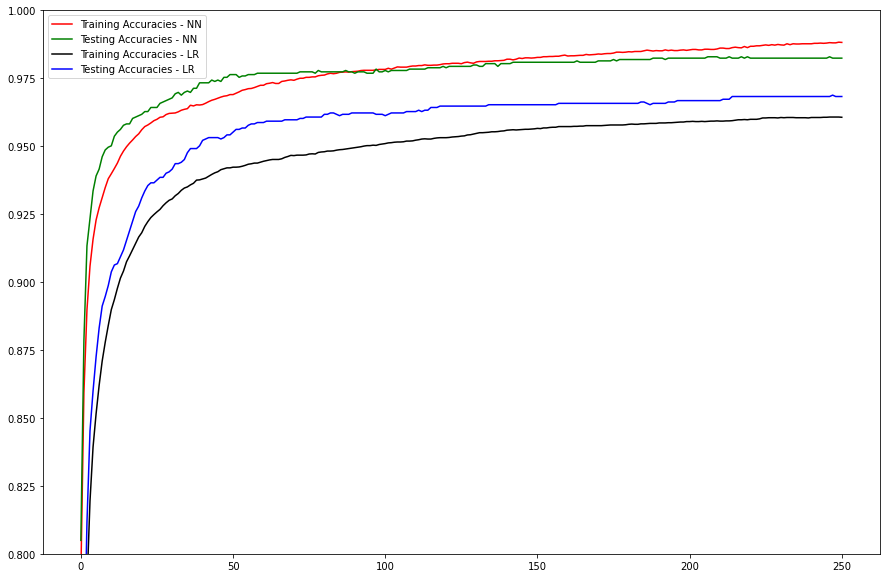

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

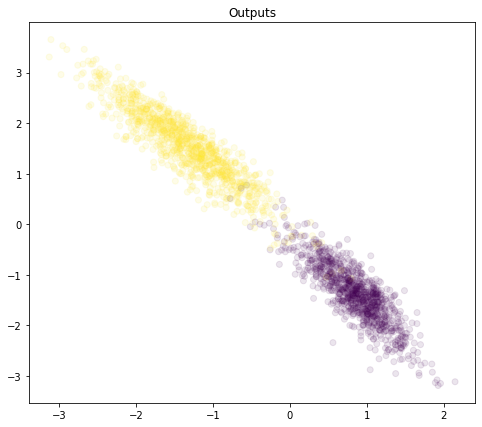

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

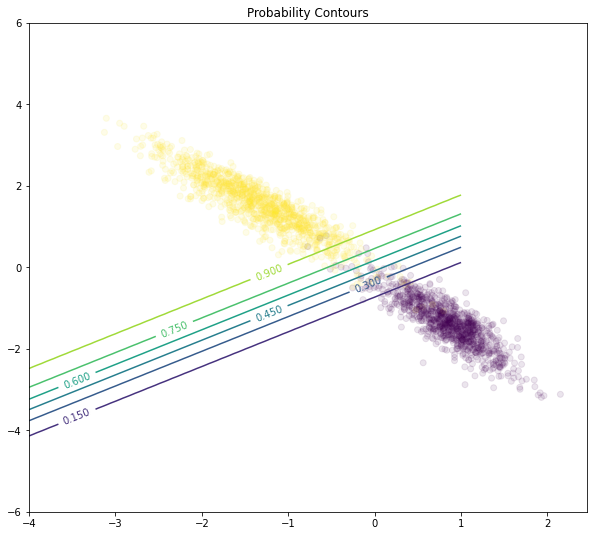

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );